# Linear Regression Case Study for Bike Sharing data
## Shared Bikes Demand Prediction - Assignment Solution
#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



**The solution is divided into the following sections:**
- Importing the required modules
- Data reading and understanding
- Data Visualisation
- Data preparation
- Model creation
- Residual Analysis
- Predictions on Test data
- Evaluations using R^2 stats

## Step 1: Importing the necessary modules
- Import the basics libraries like numpy and pandas
- Import the data visualization libraries
- Import the statsmodel and its corresponding modules
- Import the sklearn and its corresponding modules

In [ ]:
#Import the basics libraries like numpy,pandas
import numpy as np
import pandas as pd

#Import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the statsmodel and its corresponding modules
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import the sklearn and its corresponding modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Step 2: Reading and understanding the Data

Let's start with the following steps:

- Reading the structure of the data like its datatypes,shape of the data etc.
- Understanding the Statistical data of the excel file
- Finding the value_counts, unique values, null values etc.

**Reading the data**

In [ ]:
#Read the csv file using pandas and display the first 5 rows
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#To know the no. of rows and columns in the CSV File
day.shape

(730, 16)

In [ ]:
#To know the some of characteristics of the CSV File
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#To know about the Statistical data of the CSV File
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Checking Null values in the data**

In [ ]:
#To check whether the data has any null values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#To get the column names of the data
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Find the value counts of the columns from dataset**

In [ ]:
#Checking the value counts of the columns
print(day['season'].value_counts())
print(day['yr'].value_counts())
print(day['mnth'].value_counts())
print(day['holiday'].value_counts())
print(day['weekday'].value_counts())
print(day['workingday'].value_counts())
print(day['weathersit'].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


**Mapping the numerical values of data to relevant names to make them as categorical columns**

In [ ]:
#Mapping the columns
day['season']=day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day['yr']=day['yr'].map({0:'2018', 1:'2019'})
day['mnth']=day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['holiday']=day['holiday'].map({0:'No',1:'Yes'})
day['weekday']=day['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day['workingday']=day['workingday'].map({0:'No',1:'Yes'})
day['weathersit']=day['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Rain'})

In [ ]:
#Checking the value counts of the columns after mapping
print(day['season'].value_counts())
print(day['yr'].value_counts())
print(day['mnth'].value_counts())
print(day['holiday'].value_counts())
print(day['weekday'].value_counts())
print(day['workingday'].value_counts())
print(day['weathersit'].value_counts())

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64
yr
2018    365
2019    365
Name: count, dtype: int64
mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64
holiday
No     709
Yes     21
Name: count, dtype: int64
weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64
workingday
Yes    504
No     226
Name: count, dtype: int64
weathersit
Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: count, dtype: int64


In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,Mon,Yes,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Tue,Yes,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


**Converting Datatypes**

In [ ]:
#change the datatype to datetime
day['dteday'] = pd.to_datetime(day['dteday'], format='%d-%m-%Y')

In [ ]:
#change the datatype to float
day['casual'] = day['casual'].astype('float')
day['registered'] = day['registered'].astype('float')
day['cnt'] = day['cnt'].astype('float')

**The final data to be considered**

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

## Step 3: Visualising the Data

- Visualize the categorical columns using boxplot
- Visualize the numerical columns using pairplot
- Create a heatmap for the numerical columns and determine their correlations

**Boxplot for Categorical variables**

In [ ]:
cat_columns = ['season','yr','mnth','weekday','weathersit','workingday','holiday']
cat_columns

['season', 'yr', 'mnth', 'weekday', 'weathersit', 'workingday', 'holiday']

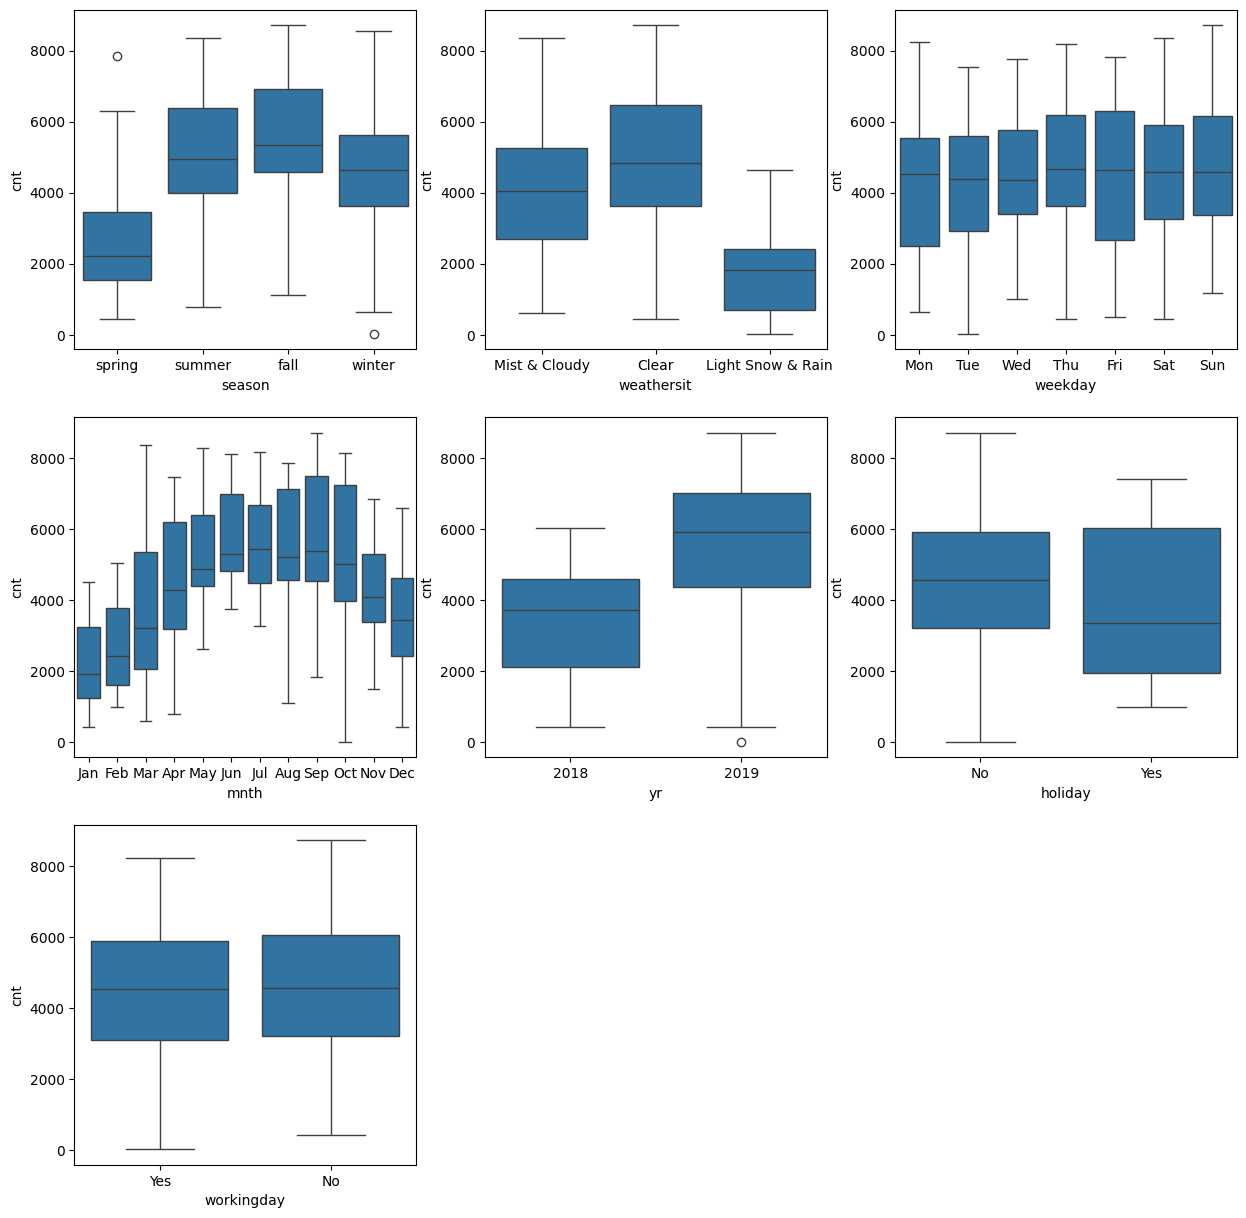

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(3,3,4)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(3,3,5)
sns.boxplot(x='yr',y='cnt',data=day)

plt.subplot(3,3,6)
sns.boxplot(x='holiday',y='cnt',data=day)

plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data=day)

plt.show()

**Inferences:**

- For the column season against cnt, fall has the highest number of bikes count.
- For the column mnth against cnt, sep has the highest number of bikes count.
- For the column yr against cnt, 2019 has the highest number of bikes count.
- For the column weekday against cnt, fri has the highest number of bikes count.
- For the column workingday against cnt, not a working day has the highest number of bikes count.
- For the column holiday against cnt, on holiday has the highest number of bikes count.
- For the weathersit season against cnt, Clear has the highest number bikes count.

**Pairplot for numerical variables**

In [ ]:
num_columns = ['temp','atemp','hum','windspeed','casual','registered','cnt']
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

<Figure size 2000x2000 with 0 Axes>

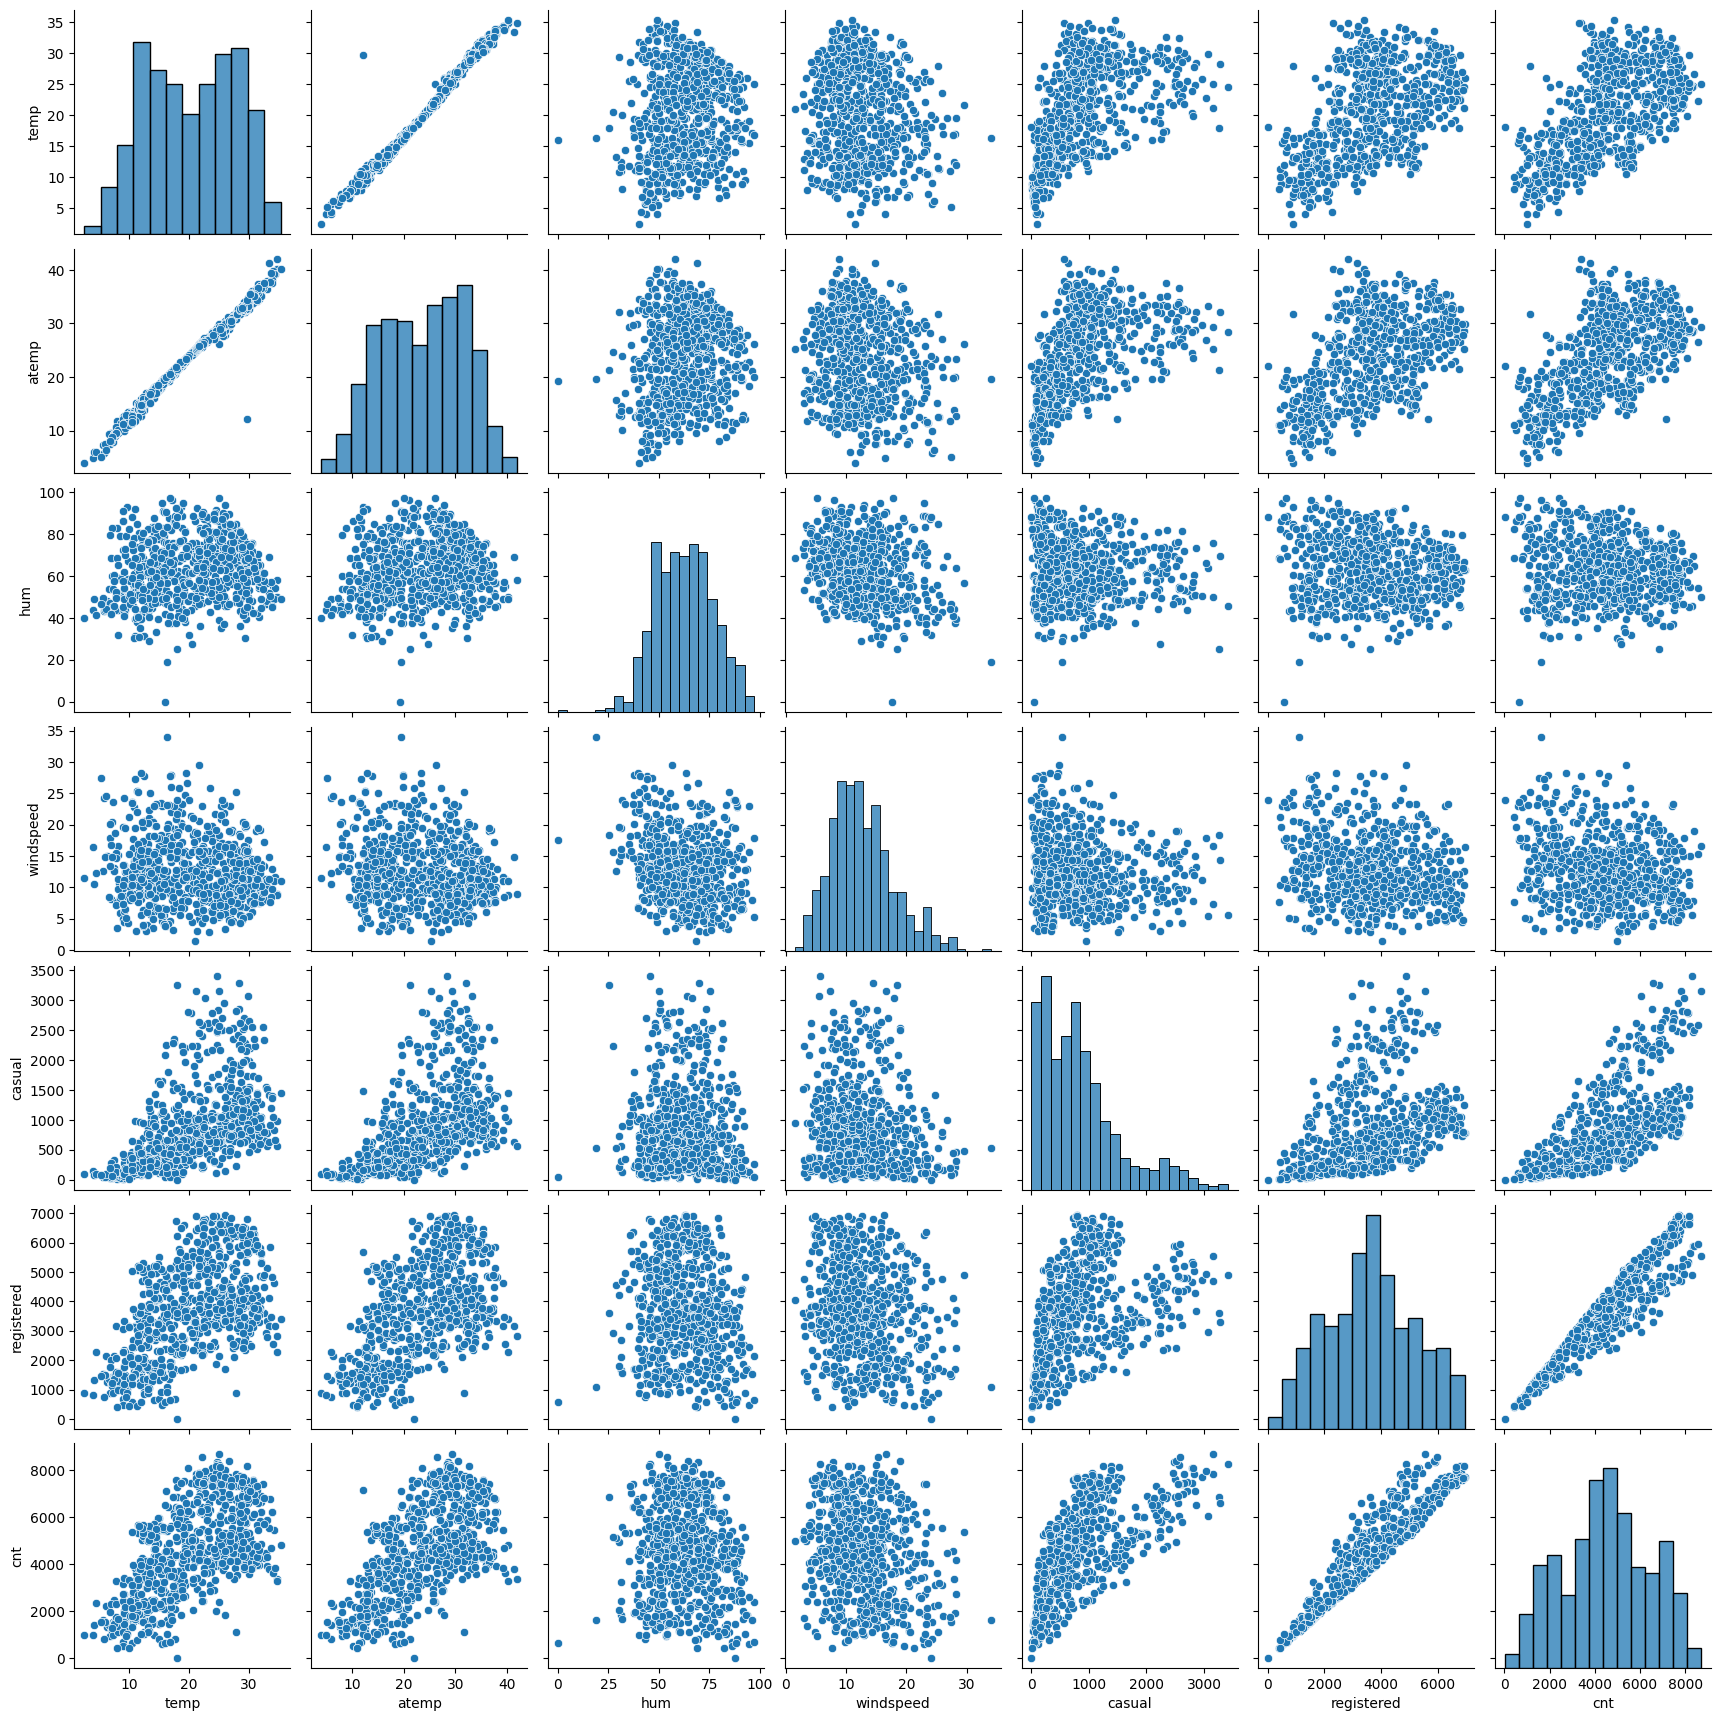

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(day[num_columns])
plt.show()

**Inferences:**

- temp and atemp columns are highly positive correlated to count column.
- casual and registered columns are also highly positive correlated to count column as they are a part of that column.

**Heatmap for numerical variables**

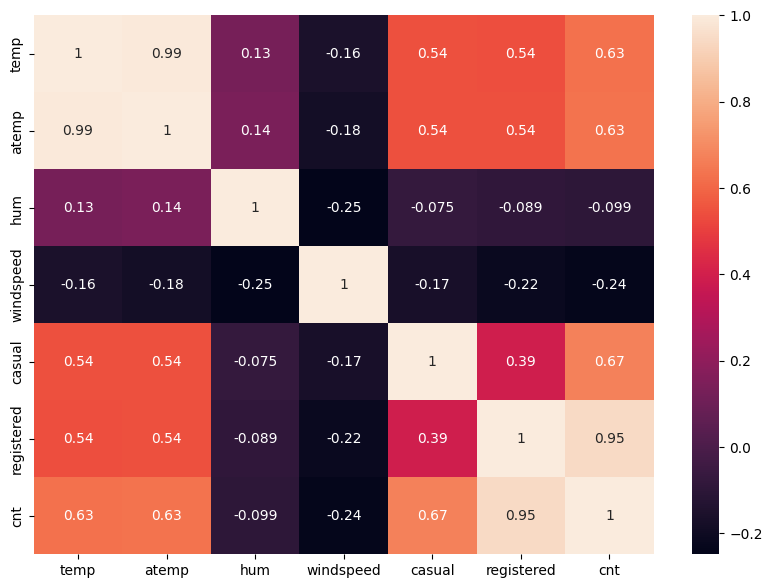

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(day[num_columns].corr(),annot = True)
plt.show()

**Inferences:**

- temp and atemp columns are highly positive correlated to count column.
- casual and registered columns are also highly positive correlated to count column as they are a part of that column.

## Step 4: Data Preparation

Let's start with the following steps:

- Create the Dummy variables for all the Categorical variables.
- Splitting data into train and test sets.
- Rescaling of data

In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Mon,Yes,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,spring,2018,Jan,No,Tue,Yes,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


**Drop the unnecessary columns:**

- 'instant' is just a row number column. So it can be dropped.
- 'dteday' is not required for any further analysis as it is a datetime column. So it can be dropped.
- 'casual' and 'registered' are dropped because these are columns are part of 'cnt' column. ('casual' + 'registered' = 'cnt')

In [ ]:
#Drop the unnecessary columns
day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [ ]:
day.shape

(730, 12)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    float64
dtypes: float64(5), object(7)
memory usage: 68.6+ KB


**Create dummy variables for those categorical variables**

In [ ]:
day_new = pd.get_dummies(day[cat_columns], drop_first = True, dtype = 'int64')

In [ ]:
day_new.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
day_new.shape

(730, 25)

In [ ]:
day = pd.concat([day, day_new], axis = 1)

In [ ]:
day.shape

(730, 37)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        730 non-null    object 
 1   yr                            730 non-null    object 
 2   mnth                          730 non-null    object 
 3   holiday                       730 non-null    object 
 4   weekday                       730 non-null    object 
 5   workingday                    730 non-null    object 
 6   weathersit                    730 non-null    object 
 7   temp                          730 non-null    float64
 8   atemp                         730 non-null    float64
 9   hum                           730 non-null    float64
 10  windspeed                     730 non-null    float64
 11  cnt                           730 non-null    float64
 12  season_spring                 730 non-null    int64  
 13  seaso

In [ ]:
day = day.drop(columns = cat_columns, axis = 1)

In [ ]:
day.shape

(730, 30)

**The new dataset is ready for model creating**

In [ ]:
day.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
0,14.110847,18.18125,80.5833,10.749882,985.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          730 non-null    float64
 1   atemp                         730 non-null    float64
 2   hum                           730 non-null    float64
 3   windspeed                     730 non-null    float64
 4   cnt                           730 non-null    float64
 5   season_spring                 730 non-null    int64  
 6   season_summer                 730 non-null    int64  
 7   season_winter                 730 non-null    int64  
 8   yr_2019                       730 non-null    int64  
 9   mnth_Aug                      730 non-null    int64  
 10  mnth_Dec                      730 non-null    int64  
 11  mnth_Feb                      730 non-null    int64  
 12  mnth_Jan                      730 non-null    int64  
 13  mnth_

**Spliting the data into trained and test sets**

In [ ]:
#Spliting of data into train and test sets.
df_train,df_test = train_test_split(day,train_size = 0.7,random_state = 300)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


**Rescaling of numerical variables in trained data**

In [ ]:
#Instatiate the Object
scaler = MinMaxScaler()

In [ ]:
scaler_columns = ['temp','atemp','hum','windspeed','cnt']

In [ ]:
#Rescaling of data
df_train[scaler_columns] = scaler.fit_transform(df_train[scaler_columns])

In [ ]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
547,0.927277,0.833624,0.460712,0.412422,0.713875,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
626,0.633172,0.617334,0.553027,0.459915,0.870801,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
309,0.371152,0.379082,0.756977,0.166191,0.417280,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
561,0.903748,0.863180,0.664663,0.338275,0.783249,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
471,0.704826,0.695057,0.402319,0.599367,0.767257,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


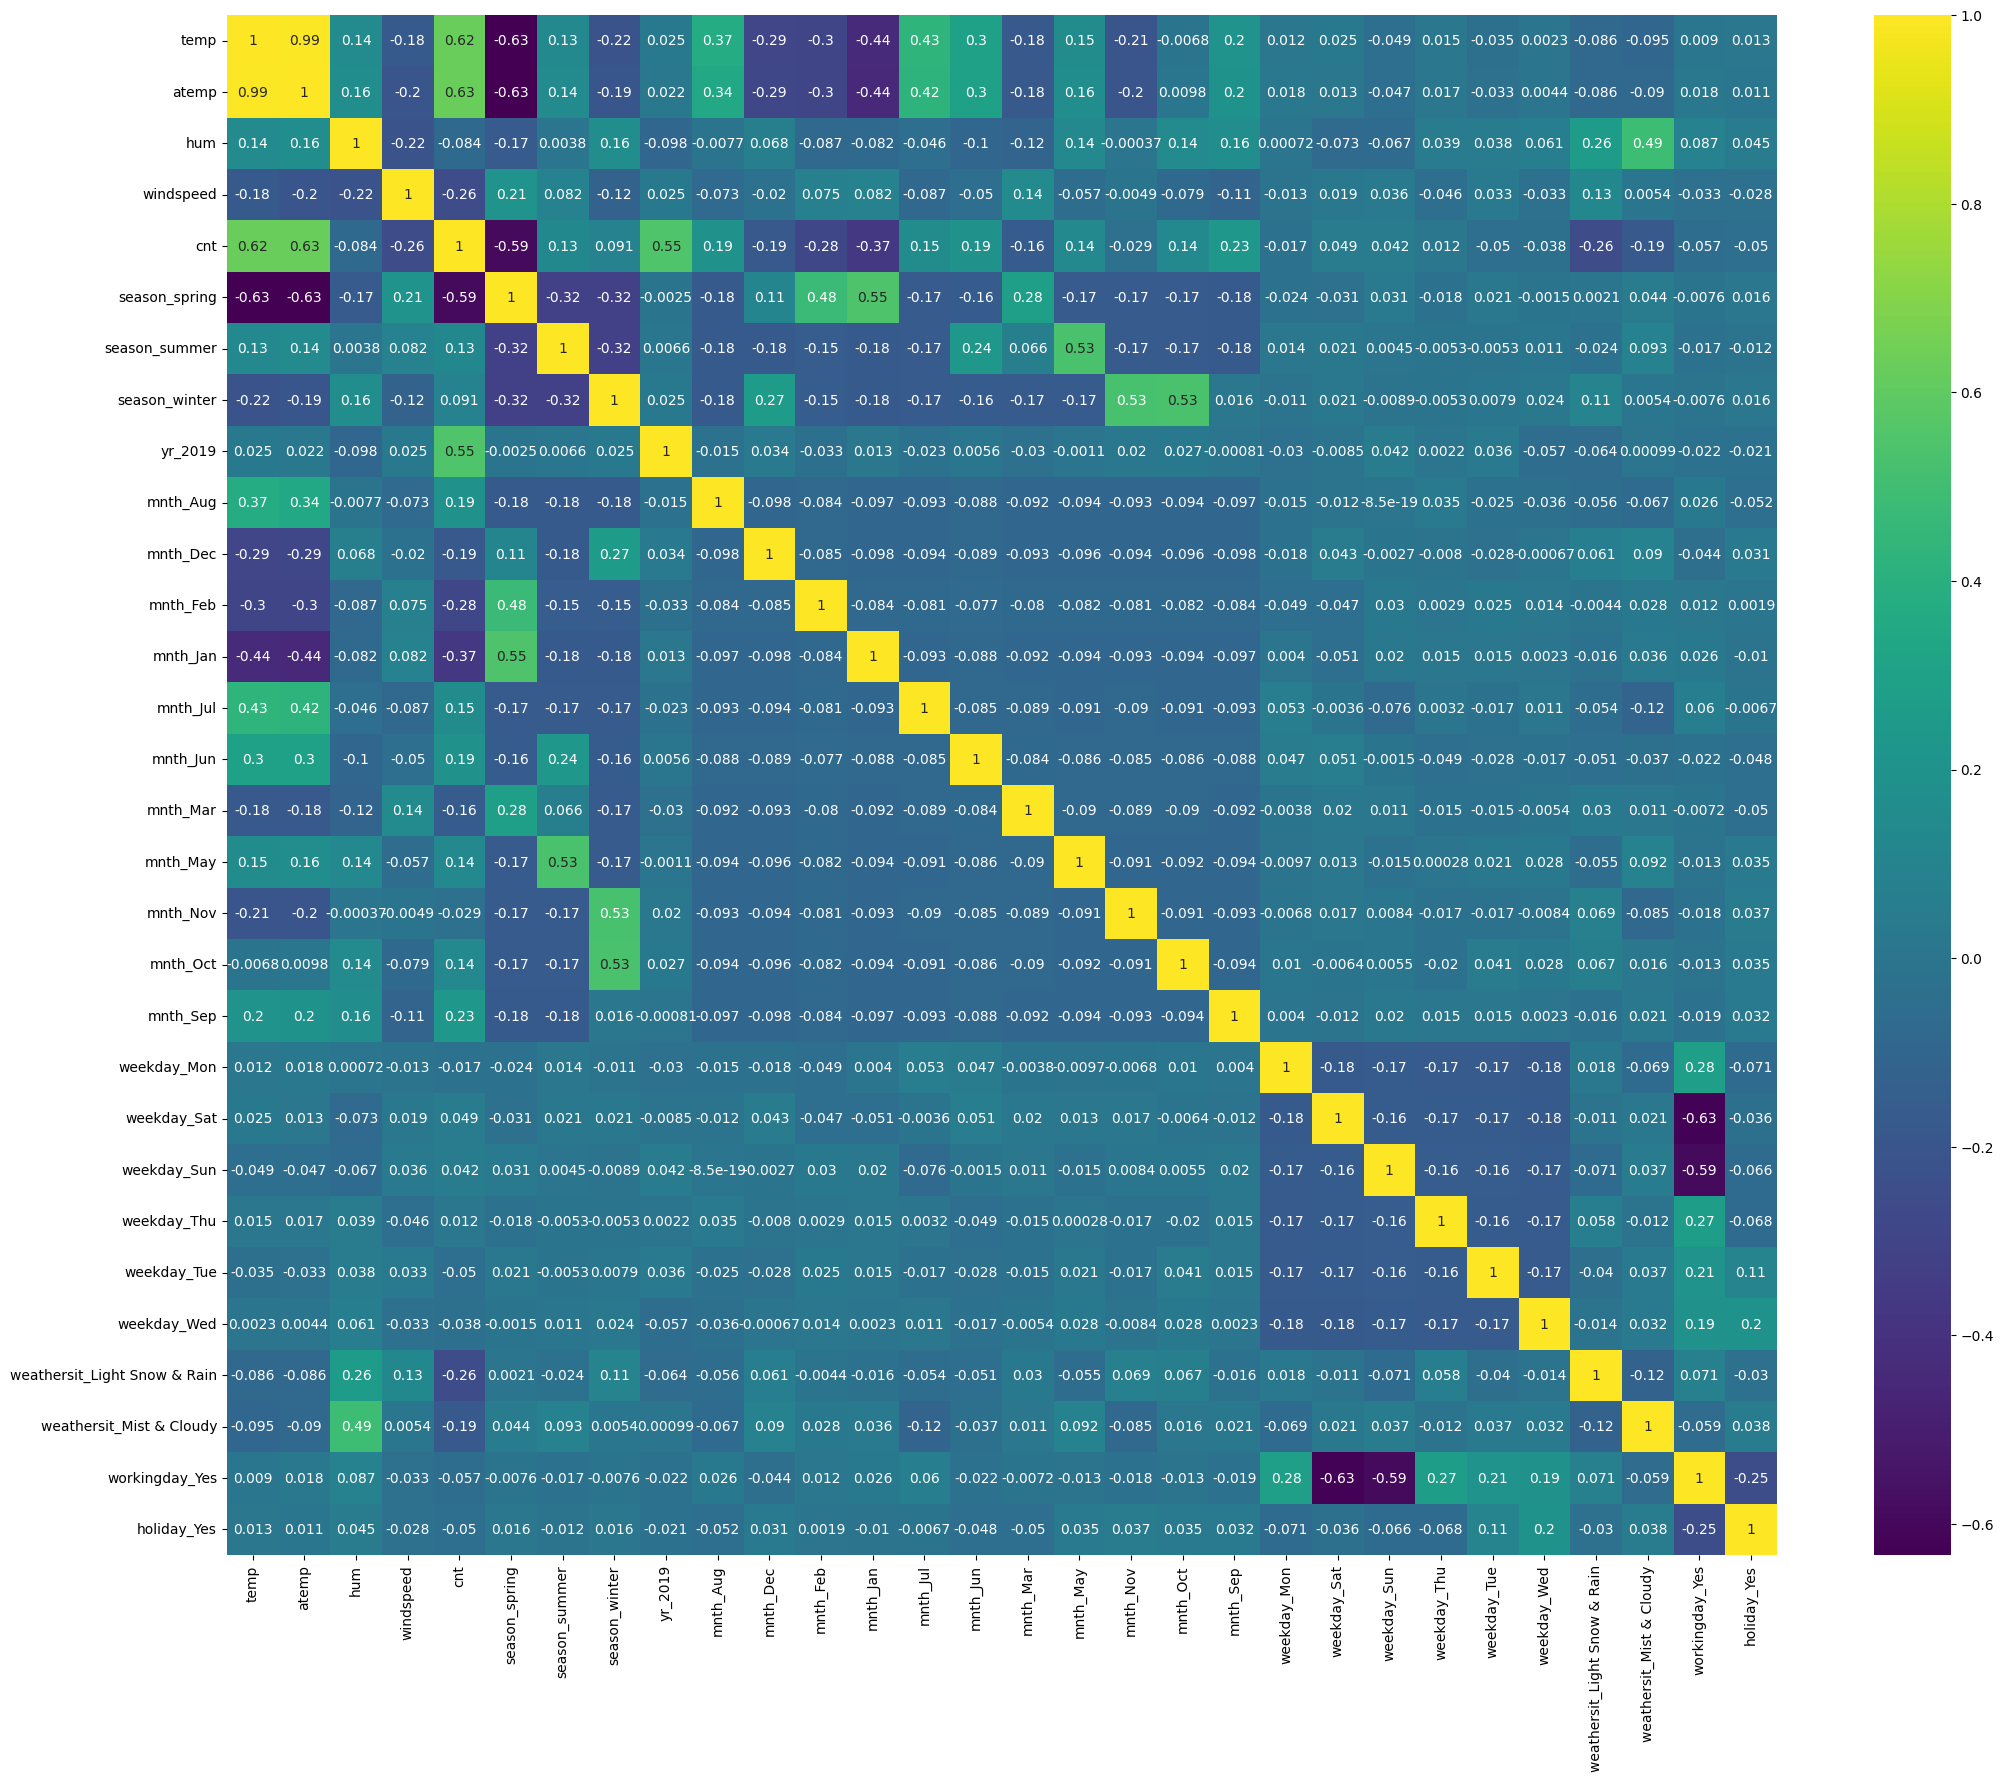

In [ ]:
#Heatmap for all the variables
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')
plt.show()

## Step-5: Model Creation

Let's start with the following steps:

- Create X_train and y_train variables
- Create a LinearRegression model with RFE using sklearn for selective features
- Again create a statsmodel linear model with the selected features
- Find the corresponding VIF for the features
- Drop the irrelevant columns and re-build the model until done



In [ ]:
day.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
0,14.110847,18.18125,80.5833,10.749882,985.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Create X_train with predictor variables and y_train with target variable**

In [ ]:
X_train = df_train.drop(['cnt'], axis = 1)
y_train = df_train['cnt']

In [ ]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
547,0.927277,0.833624,0.460712,0.412422,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
626,0.633172,0.617334,0.553027,0.459915,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
309,0.371152,0.379082,0.756977,0.166191,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
561,0.903748,0.863180,0.664663,0.338275,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
471,0.704826,0.695057,0.402319,0.599367,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
y_train.head()

547    0.713875
626    0.870801
309    0.417280
561    0.783249
471    0.767257
Name: cnt, dtype: float64

**Fit a Linear regression model using RFE to select features**

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#rfe.support_ -- This shows whether the column is supported or not
#rfe.ranking_ -- This shows the ranking of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 4),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('workingday_Yes', True, 1),
 ('holiday_Yes', True, 1)]

**These are supported columns from automated LR Model**

In [ ]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'workingday_Yes', 'holiday_Yes'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

**Building the LR Model using OLS from statsmodel module**

In [ ]:
def model_build(cols):
  X = X_train[cols]
  X_train_lm = sm.add_constant(X)
  lr = sm.OLS(y_train,X_train_lm)
  lr_model = lr.fit()
  print(lr_model.summary())

**Function to find VIF for all the variables**

In [ ]:
#Find the VIF for all the variables
def get_vif(cols):
  df = X_train[cols]
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

**Model-1:**

In [ ]:
cols1 = ['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'workingday_Yes', 'holiday_Yes']
model_build(cols1)
print('\n')
get_vif(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.84e-194
Time:                        13:38:31   Log-Likelihood:                 530.30
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     494   BIC:                            -960.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Model-2:**

In [ ]:
#atemp is dropped because of its high p-value and high VIF
cols2 = ['temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'workingday_Yes', 'holiday_Yes']
model_build(cols2)
print('\n')
get_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.78e-195
Time:                        13:38:31   Log-Likelihood:                 529.56
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     495   BIC:                            -965.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Model-3:**

In [ ]:
#hum is dropped because of its high VIF value
cols3 = ['temp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'workingday_Yes', 'holiday_Yes']
model_build(cols3)
print('\n')
get_vif(cols3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     212.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          5.21e-193
Time:                        13:38:31   Log-Likelihood:                 522.28
No. Observations:                 510   AIC:                            -1017.
Df Residuals:                     496   BIC:                            -957.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Model-4:**

In [ ]:
#workingday_Yes is dropped because of its high VIF value
cols4 = ['temp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'holiday_Yes']
model_build(cols4)
print('\n')
get_vif(cols4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.70e-192
Time:                        13:38:31   Log-Likelihood:                 518.24
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     497   BIC:                            -955.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Final Model:**

In [ ]:
X_Final = X_train[['temp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'holiday_Yes']]
X_train_final = sm.add_constant(X_Final)
fin = sm.OLS(y_train,X_train_final)
final_model = fin.fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.70e-192
Time:                        13:38:31   Log-Likelihood:                 518.24
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     497   BIC:                            -955.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Since all the p-values are significant, also all the VIF values are lessthan 5 ,the model with 84% variance seems to be accurate.**

**The Final linear regression equation is:**

**count = 0.2772 + 0.2327 * yr_2019 - 0.0598 * holiday_Yes + 0.4027 * temp - 0.1253 * windspeed - 0.1346 * season_spring + 0.0424 * season_winter - 0.2671 * weathersit_Light Snow & Rain - 0.0814 * weathersit_Mist & Cloudy + 0.0264 * weekday_Sat + 0.0269 * weekday_Sun - 0.0639 * month_Jul + 0.0641 * month_Sep**

## Step-6: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = final_model.predict(X_train_final)

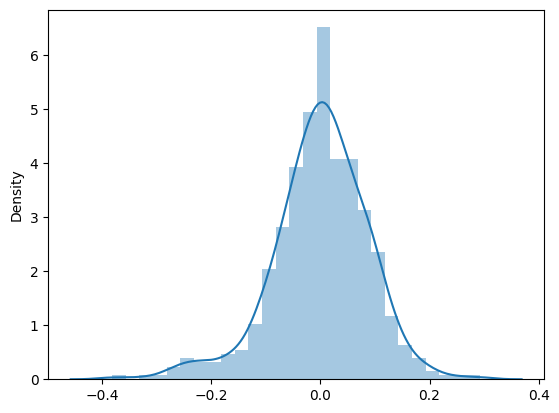

In [ ]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

**The residuals are normally distributed for trained data**

## Step-7: Predictions on test set

Let's start with the following steps:

- Rescale the numerical columns of df_test using transform()
- Create X_test and y_test variables
- Create a linear regression model for X_test
- Now predict the test set predictions using predict() functioon


**Rescaling of numerical variables in test data**

In [ ]:
#Create a list of numeric variables i.e., other than the categorical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [ ]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
146,0.798941,0.746604,0.673679,0.520759,0.535780,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
263,0.687715,0.630888,0.927436,0.176569,0.498159,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,0.455641,0.447507,0.640189,0.330861,0.465255,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
552,1.029946,0.971286,0.507084,0.336765,0.554303,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
302,0.333721,0.324179,0.642765,0.367929,0.380695,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.565104,0.535816,0.657457,0.376961,0.522408,0.250,0.268182,0.240909,0.522727,0.077273,...,0.127273,0.131818,0.163636,0.150000,0.154545,0.118182,0.022727,0.368182,0.681818,0.031818
std,0.226953,0.208750,0.145973,0.173061,0.222900,0.434,0.444023,0.428610,0.500622,0.267633,...,0.334038,0.339064,0.370789,0.357886,0.362295,0.323559,0.149373,0.483411,0.466833,0.175916
min,0.047987,0.026455,0.193646,0.057872,0.047055,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359121,0.350365,0.554315,0.265179,0.363064,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.588255,0.571714,0.665092,0.354578,0.518465,0.000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.762578,0.707754,0.760519,0.484033,0.708295,0.250,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.029946,1.019437,1.002146,1.157215,0.981707,1.000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 146 to 337
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          220 non-null    float64
 1   atemp                         220 non-null    float64
 2   hum                           220 non-null    float64
 3   windspeed                     220 non-null    float64
 4   cnt                           220 non-null    float64
 5   season_spring                 220 non-null    int64  
 6   season_summer                 220 non-null    int64  
 7   season_winter                 220 non-null    int64  
 8   yr_2019                       220 non-null    int64  
 9   mnth_Aug                      220 non-null    int64  
 10  mnth_Dec                      220 non-null    int64  
 11  mnth_Feb                      220 non-null    int64  
 12  mnth_Jan                      220 non-null    int64  
 13  mnth_Jul

**Create X_test with predictor variables and y_test with target variable**

In [ ]:
y_test = df_test['cnt']
X_test = df_test.drop(['cnt'], axis=1)

In [ ]:
y_test.head()

146    0.535780
263    0.498159
426    0.465255
552    0.554303
302    0.380695
Name: cnt, dtype: float64

In [ ]:
X_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,workingday_Yes,holiday_Yes
146,0.798941,0.746604,0.673679,0.520759,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
263,0.687715,0.630888,0.927436,0.176569,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,0.455641,0.447507,0.640189,0.330861,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
552,1.029946,0.971286,0.507084,0.336765,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
302,0.333721,0.324179,0.642765,0.367929,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


**Create a LR Model using OLS from statsmodel for test data**

In [ ]:
X_Final.columns

Index(['temp', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'holiday_Yes'],
      dtype='object')

In [ ]:
col1=X_Final.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 146 to 337
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   temp                          220 non-null    float64
 2   windspeed                     220 non-null    float64
 3   season_spring                 220 non-null    int64  
 4   season_winter                 220 non-null    int64  
 5   yr_2019                       220 non-null    int64  
 6   mnth_Jul                      220 non-null    int64  
 7   mnth_Sep                      220 non-null    int64  
 8   weekday_Sat                   220 non-null    int64  
 9   weekday_Sun                   220 non-null    int64  
 10  weathersit_Light Snow & Rain  220 non-null    int64  
 11  weathersit_Mist & Cloudy      220 non-null    int64  
 12  holiday_Yes                   220 non-null    int64  
dtypes: float

**Prediction of test model over final LR model**

In [ ]:
y_test_pred = final_model.predict(X_test_lm)
y_test_pred.head()

146    0.560691
263    0.514744
426    0.462908
552    0.845605
302    0.407963
dtype: float64

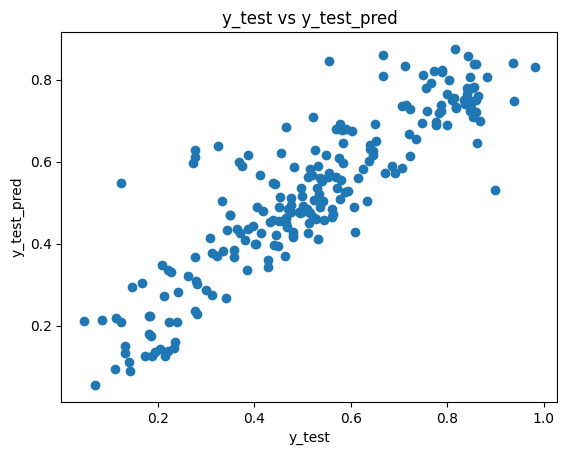

In [ ]:
#Scatter plot of predictions
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs y_test_pred')
plt.show()

## Step-8: Evaluations on test set

- Calculate the values of trained data R^2 and Adjusted trained data R^2.
- Calculate the values the values of tested data R^2 and Adjusted tested data R^2.
- Compare the above values

**Evaluating R-squared value for trained data**

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.8451812640366154

**Evaluating Adjusted R-squared value for trained data**

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

train_adjusted_r2 = 1-(1-r2_train)*(n-1)/(n-p-1)
train_adjusted_r2

0.8358276320721609

**Evaluating R-squared value for test data**

In [ ]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.7837563439479481

**Evaluating Adjusted R-squared value for test data**

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

test_adjusted_r2 = 1-(1-r2_test)*(n-1)/(n-p-1)
test_adjusted_r2

0.7712204798289886

**We can confirm that both Adjusted R-squared values of trained data and test data are similar**

## Conclusion

**The Final linear regression equation is :**

count = 0.2772 + 0.2327 * yr_2019 - 0.0598 * holiday_Yes + 0.4027 * temp - 0.1253 * windspeed - 0.1346 * season_spring + 0.0424 * season_winter - 0.2671 * weathersit_Light Snow & Rain - 0.0814 * weathersit_Mist & Cloudy + 0.0264 * weekday_Sat + 0.0269 * weekday_Sun - 0.0639 * month_Jul + 0.0641 * month_Sep

- The top features that are directly influencing the bike count are the features with highest co-efficients are temp and yr_2019.

- The top 3 features that are indirectly influencing the count are the features with lowest co-efficients are season_spring, windspeed and weathersit_Light Snow & Rain.

- The positive coefficients imply the factors which, on increasing, would lead to the increase in count and the negative coefficients imply that the factors with negative coeff. on increase, would lead to the decrease in total count.